In [1]:
library(tidyverse)
library(palmerpenguins)
library(ggthemes)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# options(repr.plot.width = 15, repr.plot.height = 11.25, repr.plot.res = 100)

#### 1. How many rows are in penguins? How many columns?

In [3]:
sprintf("Penguins has %s rows, %s cols.", nrow(penguins), ncol(penguins))

[1] "Penguins has 344 rows, 8 cols."

#### 2. What does the `bill_depth_mm` variable in the `penguins` data frame describe? Read the help for `?penguins` to find out.

In [4]:
?penguins

penguins            package:palmerpenguins             R Documentation

_S_i_z_e _m_e_a_s_u_r_e_m_e_n_t_s _f_o_r _a_d_u_l_t _f_o_r_a_g_i_n_g _p_e_n_g_u_i_n_s _n_e_a_r _P_a_l_m_e_r _S_t_a_t_i_o_n,
_A_n_t_a_r_c_t_i_c_a

_D_e_s_c_r_i_p_t_i_o_n:

     Includes measurements for penguin species, island in Palmer
     Archipelago, size (flipper length, body mass, bill dimensions),
     and sex. This is a subset of ‘penguins_raw’.

_U_s_a_g_e:

     penguins
     
_F_o_r_m_a_t:

     A tibble with 344 rows and 8 variables:

     species a factor denoting penguin species (Adélie, Chinstrap and
          Gentoo)

     island a factor denoting island in Palmer Archipelago, Antarctica
          (Biscoe, Dream or Torgersen)

     bill_length_mm a number denoting bill length (millimeters)

     bill_depth_mm a number denoting bill depth (millimeters)

     flipper_length_mm an integer denoting flipper length (mi

>  bill_depth_mm a number denoting bill depth (millimeters)

#### 3. Make a scatterplot of `bill_depth_mm` vs. `bill_length_mm`. That is, make a scatterplot with `bill_depth_mm` on the y-axis and `bill_length_mm` on the x-axis. Describe the relationship between these two variables.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


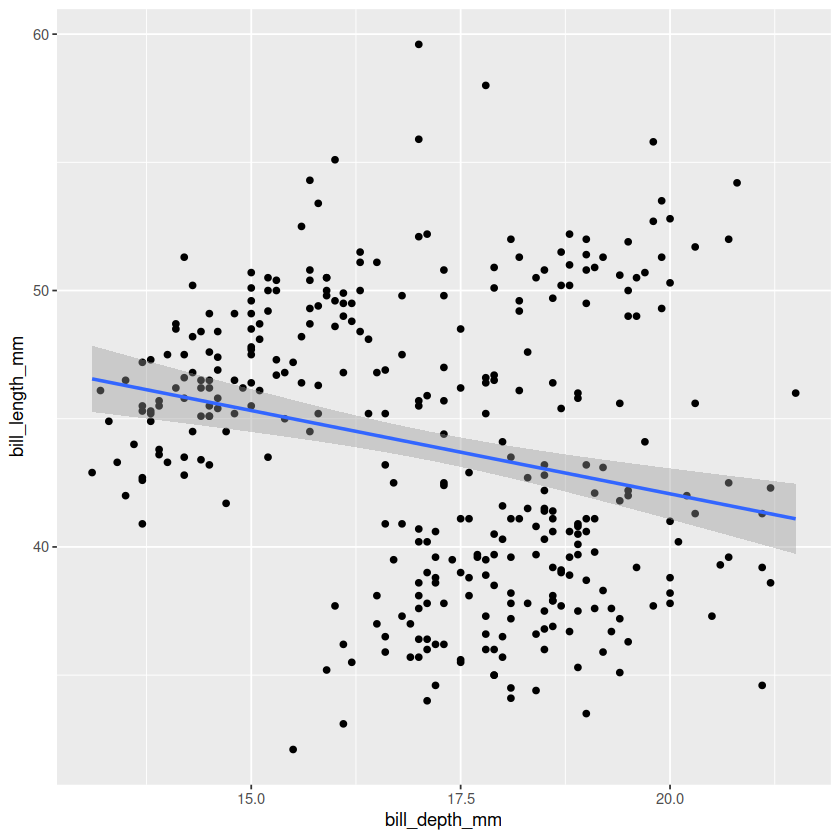

In [5]:
ggplot(
  data = penguins,
  mapping = aes(
    x = bill_depth_mm,
    y = bill_length_mm,
  )
) + scale_color_colorblind() + geom_point() + geom_smooth(method = "lm")

> The relationship seems to be linear and negatively correlated.  However, this is only in aggregate.  If we check out their species...

`geom_smooth()` using formula = 'y ~ x'


Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


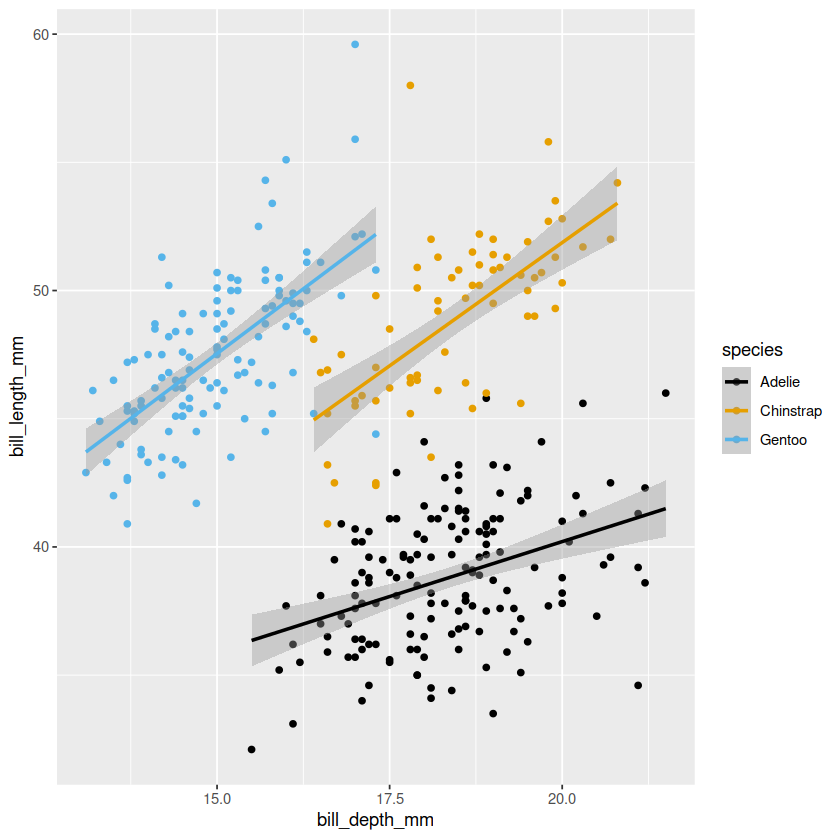

In [6]:
ggplot(
  data = penguins,
  mapping = aes(
    x = bill_depth_mm,
    y = bill_length_mm,
    color = species,
  )
) +
  geom_point() +
  geom_smooth(method = "lm") +
  scale_color_colorblind()

> Here we can see an overall positive correlation between the depth and length in each species

#### 4. What happens if you make a scatterplot of species vs. bill_depth_mm? What might be a better choice of geom?

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


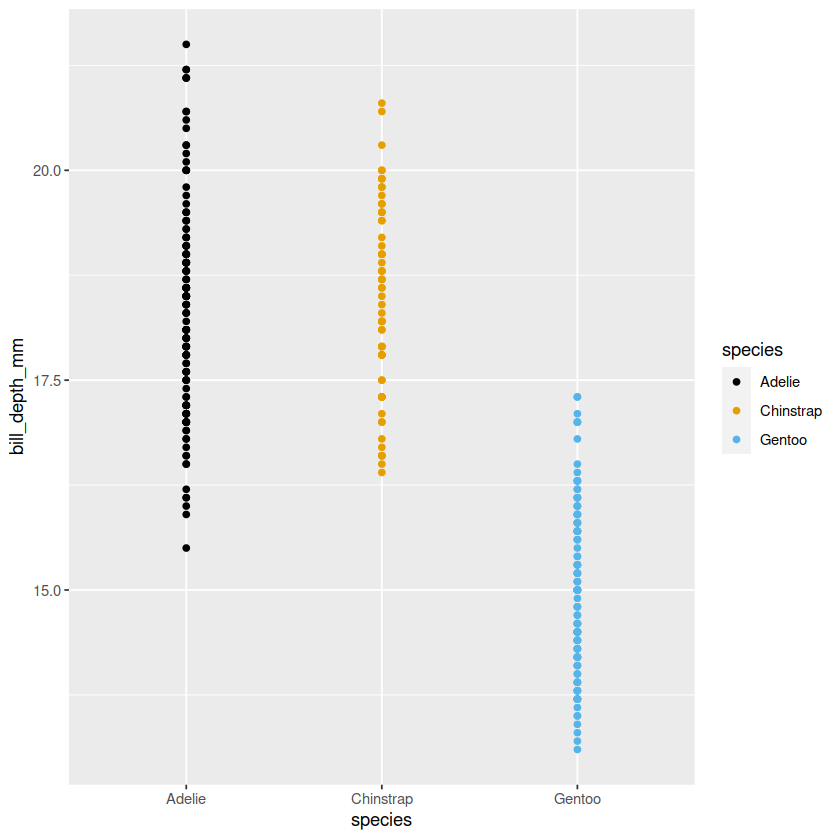

In [7]:
ggplot(
  data = penguins,
  mapping = aes(
    x = species,
    y = bill_depth_mm,
    color = species,
  )
) +
  geom_point() +
  scale_color_colorblind()

> If our goal is to compare the differences in samples within species, as well as across species, a boxplot may be the better idea.

#### 5. Why does the following give an error and how would you fix it?
```
  ggplot(data = penguins) + 
    geom_point()
```

> There are no specified x and y axes. 

#### 6. What does the `na.rm` argument do in `geom_point()`? What is the default value of the argument? Create a scatterplot where you successfully use this argument set to TRUE.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”


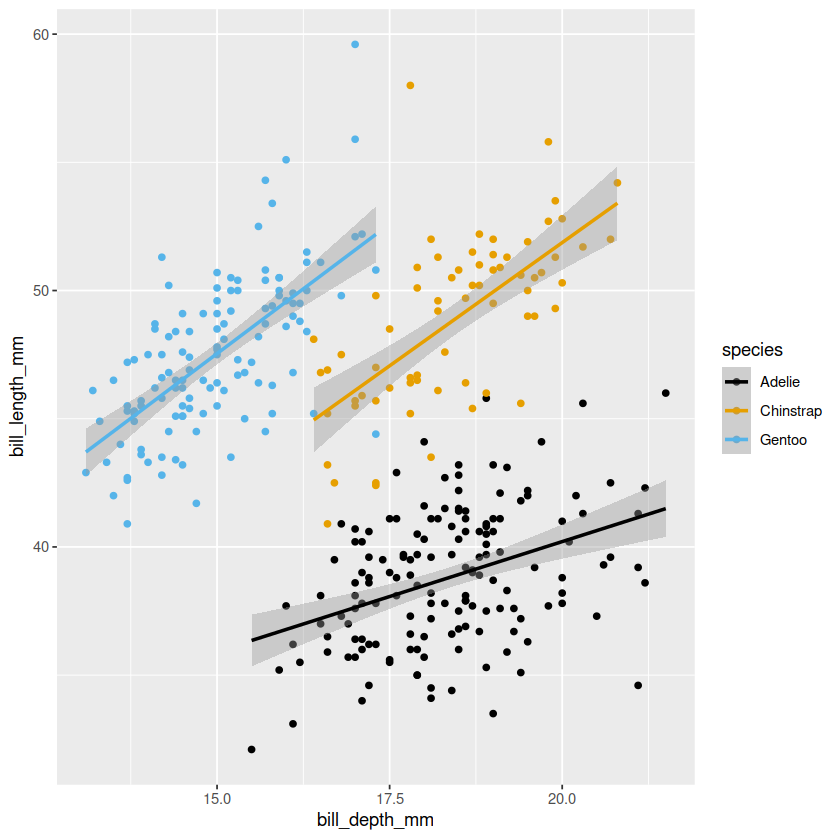

In [8]:
ggplot(
  data = penguins,
  mapping = aes(
    x = bill_depth_mm,
    y = bill_length_mm,
    color = species,
  )
) +
  geom_point(na.rm = TRUE) +
  geom_smooth(method = "lm") +
  scale_color_colorblind()

> Removes rows with `na` values, so not to raise an error

#### 7.  Add the following caption to the plot you made in the previous exercise: “Data comes from the palmerpenguins package.” Hint: Take a look at the documentation for `labs()`.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”


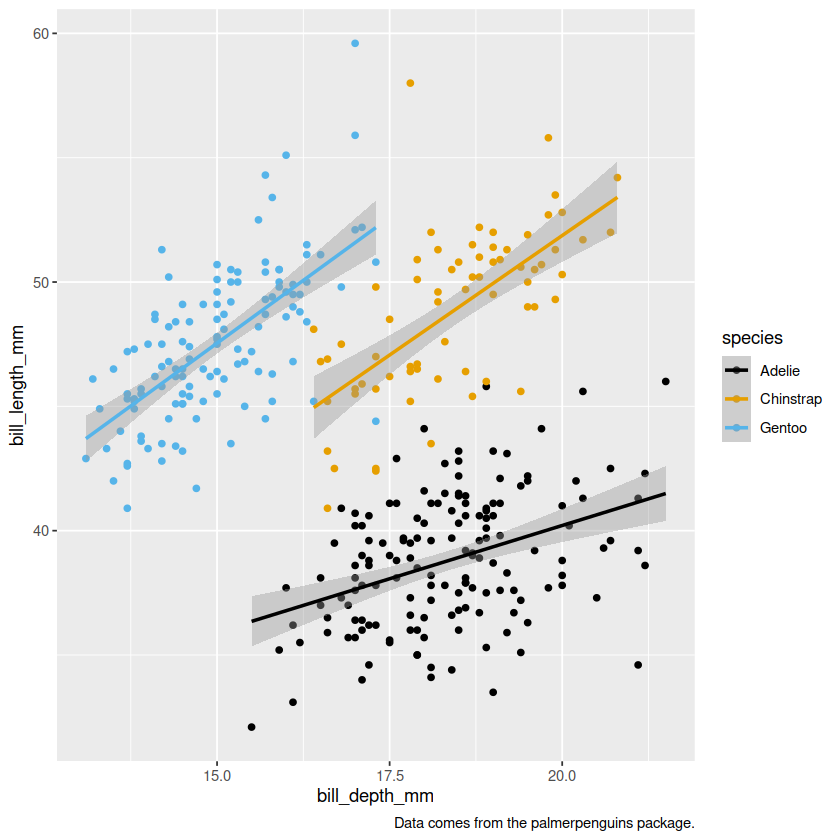

In [9]:
ggplot(
  data = penguins,
  mapping = aes(
    x = bill_depth_mm,
    y = bill_length_mm,
    color = species,
  )
) +
  geom_point(na.rm = TRUE) +
  geom_smooth(method = "lm") +
  labs(caption = "Data comes from the palmerpenguins package.") +
  scale_color_colorblind()

#### 8.  Recreate the following visualization. What aesthetic should `bill_depth_mm` be mapped to? And should it be mapped at the global level or at the geom level?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


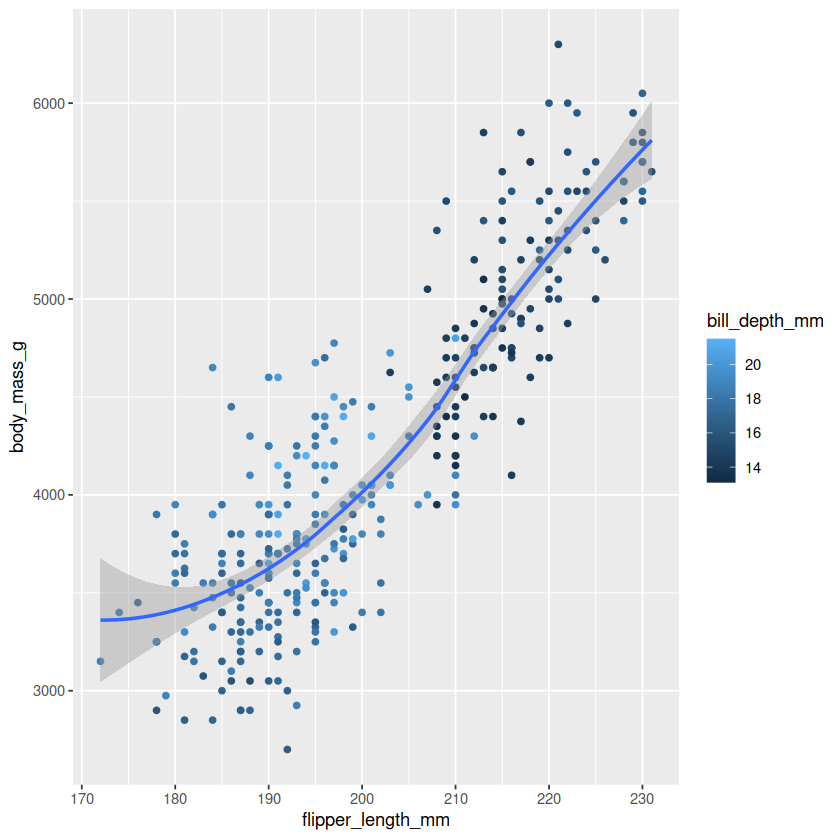

In [10]:
ggplot(
  data = penguins,
  mapping = aes(
    x = flipper_length_mm,
    y = body_mass_g,
  )
) +
  geom_point(aes(color = bill_depth_mm)) +
  geom_smooth()

#### 9. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


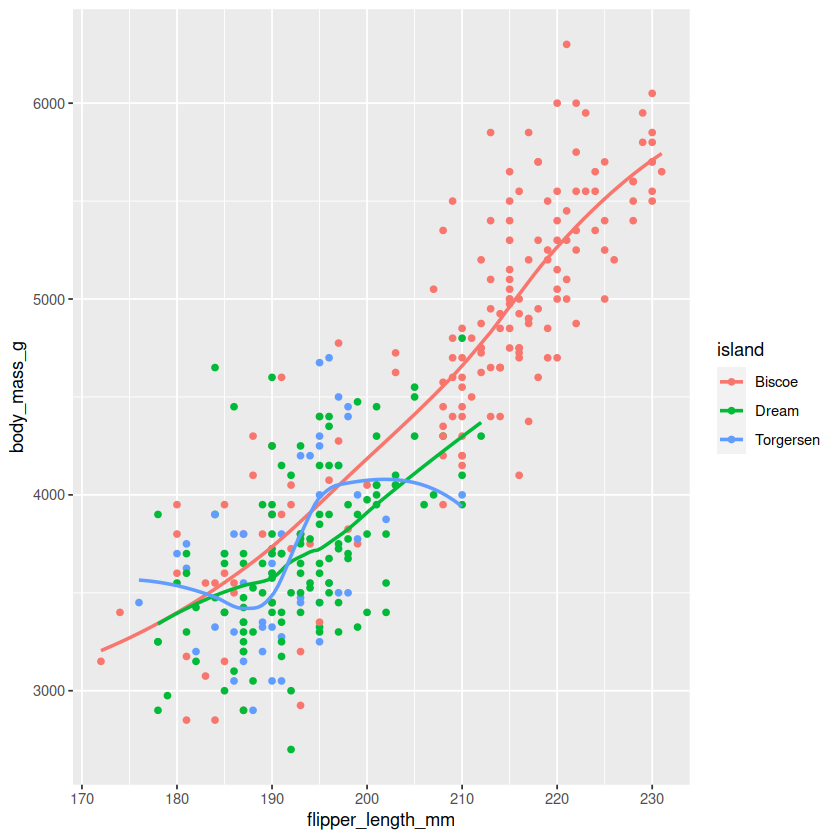

In [12]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = island)
) +
  geom_point() +
  geom_smooth(se = FALSE)

> `se` in `geom_smooth()` removes the confidence intervals around the smoothed line.

#### 10. Will these two graphs look different? Why/why not?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


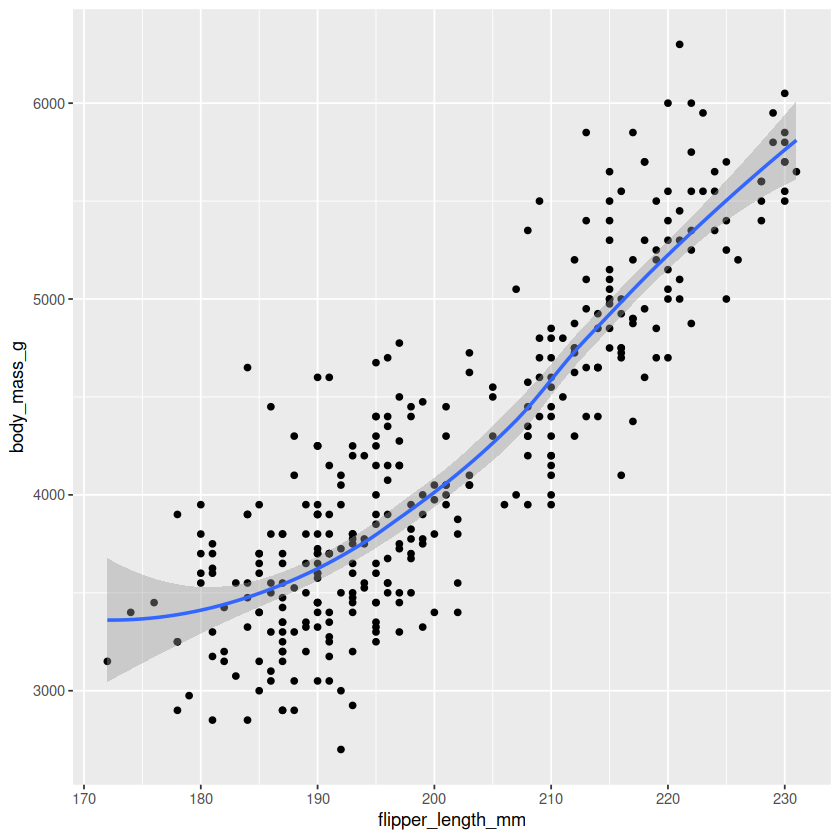

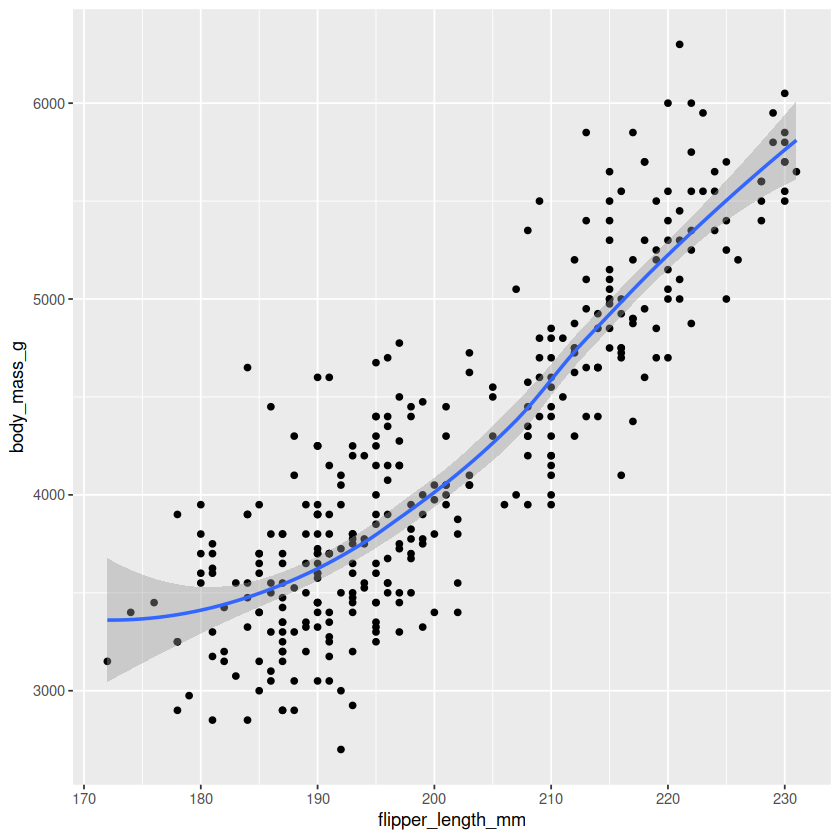

In [11]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point() +
  geom_smooth()

ggplot() +
  geom_point(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  ) +
  geom_smooth(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  )

> The reason these turn out the same is because the first has the following additions inhereting styles from the mapping in `ggplot`.  The second makes these explicit.